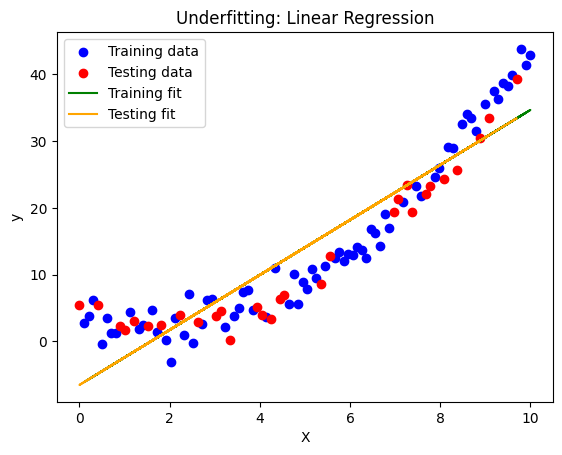

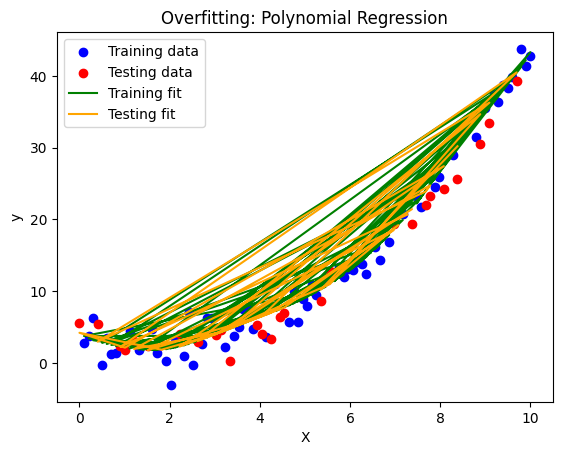

Mean Squared Error (Underfitting): 23.72716180961754
Mean Squared Error (Overfitting): 4.727281726056905


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate sample data with a quadratic relationship and some noise
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 0.5 * X**2 - X + 2 + np.random.randn(100) * 2

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a function to visualize the results
def plot_fit(X_train, y_train, X_test, y_test, y_pred_train, y_pred_test, title):
    plt.scatter(X_train, y_train, label='Training data', color='blue')
    plt.scatter(X_test, y_test, label='Testing data', color='red')
    plt.plot(X_train, y_pred_train, label='Training fit', color='green')
    plt.plot(X_test, y_pred_test, label='Testing fit', color='orange')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Linear Regression Model (Underfitting)
model_underfit = LinearRegression()
model_underfit.fit(X_train.reshape(-1, 1), y_train)
y_pred_train_underfit = model_underfit.predict(X_train.reshape(-1, 1))
y_pred_test_underfit = model_underfit.predict(X_test.reshape(-1, 1))

# Plot underfitting results
plot_fit(X_train, y_train, X_test, y_test, y_pred_train_underfit, y_pred_test_underfit, 'Underfitting: Linear Regression')

# Polynomial Regression Model (Overfitting)
degree = 10  # Degree of the polynomial
model_overfit = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_overfit.fit(X_train.reshape(-1, 1), y_train)
y_pred_train_overfit = model_overfit.predict(X_train.reshape(-1, 1))
y_pred_test_overfit = model_overfit.predict(X_test.reshape(-1, 1))

# Plot overfitting results
plot_fit(X_train, y_train, X_test, y_test, y_pred_train_overfit, y_pred_test_overfit, 'Overfitting: Polynomial Regression')

# Calculate Mean Squared Error for both models
mse_underfit = mean_squared_error(y_test, y_pred_test_underfit)
mse_overfit = mean_squared_error(y_test, y_pred_test_overfit)

print("Mean Squared Error (Underfitting):", mse_underfit)
print("Mean Squared Error (Overfitting):", mse_overfit)
